In [118]:
import cv2 as cv
import os
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.DataFrame({"images":[], "label":[]})
train_path = '../raw data/asl_dataset/'
df_test = pd.DataFrame({"images":[], "label":[]})
test_path = '../raw data/asl_lg/'
folders = glob(train_path+'/*')
test_folders = glob(test_path+'/*')
noclasses = len(folders)
notestclasses = len(test_folders)

In [119]:
for path in folders:
    img_path = glob(path+'/*')
    _,label = os.path.split(path)
    files = os.listdir(path)
    for filename in files:
        im = cv.imread(path+'/'+filename, 64).flatten() # 64 is for IMREAD_REDUCED_GRAYSCALE_8 (grayscale, 1/8th)
#         res = cv.resize(im, dsize=(42, 42)) # resize image
        if (path[-1].isdigit() == False):
            data = pd.DataFrame({"images":[im], "label":[label]})
            df = df.append(data, ignore_index = True)   
                
for path in test_folders:
    img_path = glob(path+'/*')
    _,label = os.path.split(path)
    files = os.listdir(path)
    for filename in files:
        im = cv.imread(path+'/'+filename, 64).flatten() # 64 is for IMREAD_REDUCED_GRAYSCALE_8 (grayscale, 1/8th)
        data = pd.DataFrame({"images":[im], "label":[label]})
        df_test = df_test.append(data, ignore_index = True)
        df = df.append(data, ignore_index = True)

AttributeError: 'NoneType' object has no attribute 'flatten'

In [120]:
# X_train = np.vstack(df['images'])
# y_train = df['label']
# X_test = np.vstack(df_test['images'])
# y_test = df_test['label']
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)
# print(y_train)

In [121]:
from sklearn.model_selection import train_test_split
X = np.vstack(df['images'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train)
print(y_test)

(1380, 2500)
(1380,)
(460, 2500)
(460,)
740     o
1623    y
399     z
1433    b
1291    x
       ..
835     m
1216    q
1653    y
559     a
684     f
Name: label, Length: 1380, dtype: object
733     o
53      r
1762    w
412     z
1074    d
       ..
1328    e
1502    k
713     o
997     c
1741    p
Name: label, Length: 460, dtype: object


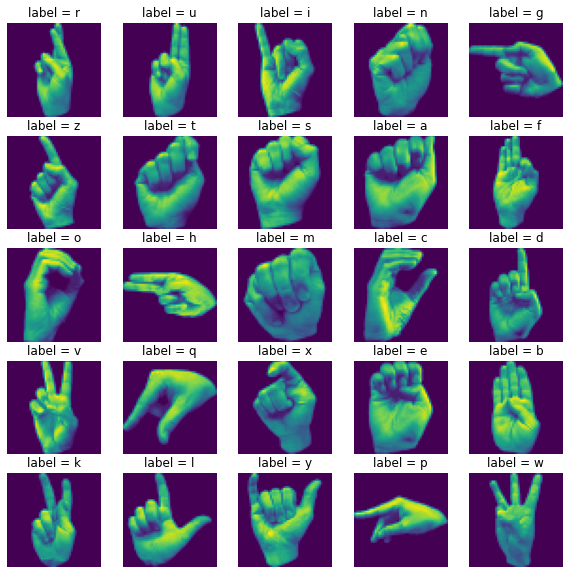

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import math

gridsize = 5
numfigs = gridsize**2
figsize = (10, 10)
cols = gridsize
rows = gridsize

def trim(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]
    
plot, axs = plt.subplots(rows, cols, figsize=figsize)
axs = trim(axs, numfigs)
for ax, fig in zip(axs, range(0, 1890, math.floor(1890/numfigs))):
    sign = X[fig]
    sign_pixels = sign.reshape(50, 50)
    ax.imshow(sign_pixels)
    ax.axis('off')
    ax.set_title('label = %s' % str(y[fig]))

In [123]:
print("Images training data shape:")
print(X_train.shape)
print("\nLabels training data shape:")
print(y_train.shape)
print("\nImages test data shape:")
print(X_test.shape)
print("\nLabels test data shape:")
print(y_test.shape)

Images training data shape:
(1380, 2500)

Labels training data shape:
(1380,)

Images test data shape:
(460, 2500)

Labels test data shape:
(460,)


In [124]:
from sklearn.linear_model import LogisticRegression
# in my research for this, I found that the default solver (lbfgs) is too slow for this problem.
logisticRegr = LogisticRegression(C=50. / len(X_train), penalty='l1', solver='saga', tol=0.1)
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
# show score to confirm success 
score = logisticRegr.score(X_test, y_test)
print(score)

0.9282608695652174


In [132]:
X_test_2 = np.vstack(df_test['images'])
y_test_2 = df_test['label']
logisticRegr = LogisticRegression(C=50. / len(X_train), penalty='l1', solver='saga', tol=0.1)
logisticRegr.fit(X_train, y_train)
predictions_2 = logisticRegr.predict(X_test_2)
# show score to confirm success 
score = logisticRegr.score(X_test_2, y_test_2)
print(score)

0.36


In [133]:
from sklearn.metrics import classification_report
print(
    f"Classification report:\n"
    f"{classification_report(y_test, predictions)}\n"
)

Classification report:
              precision    recall  f1-score   support

           a       1.00      0.82      0.90        22
           b       0.86      0.92      0.89        13
           c       1.00      0.92      0.96        26
           d       1.00      0.95      0.97        20
           e       0.96      1.00      0.98        27
           f       1.00      0.95      0.97        19
           g       0.88      0.93      0.90        15
           h       1.00      0.82      0.90        11
           i       0.96      1.00      0.98        22
           j       0.94      0.94      0.94        18
           k       0.94      1.00      0.97        17
           l       0.95      0.95      0.95        20
           m       0.62      1.00      0.76         8
           n       1.00      0.73      0.84        22
           o       0.89      1.00      0.94        17
           p       0.95      1.00      0.97        19
           q       1.00      0.94      0.97        18
    

In [134]:
from sklearn.metrics import classification_report
print(
    f"Classification report:\n"
    f"{classification_report(y_test_2, predictions_2)}\n"
)

Classification report:
              precision    recall  f1-score   support

           a       0.00      0.00      0.00         1
           b       0.00      0.00      0.00         1
           c       0.00      0.00      0.00         1
           d       0.00      0.00      0.00         1
           e       0.00      0.00      0.00         1
           f       0.00      0.00      0.00         1
           g       0.00      0.00      0.00         1
           h       0.00      0.00      0.00         1
           i       0.00      0.00      0.00         1
           j       1.00      1.00      1.00         1
           k       0.00      0.00      0.00         1
           l       1.00      1.00      1.00         1
           m       0.50      1.00      0.67         1
           n       0.33      1.00      0.50         1
           o       0.00      0.00      0.00         1
           p       0.00      0.00      0.00         1
           q       0.00      0.00      0.00         1
    

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [135]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict:
        misclassifiedIndexes.append(index)
    index +=1

In [136]:
index = 0
misclassifiedIndexes_2 = []
for label, predict in zip(y_test_2, predictions_2):
    if label != predict:
        misclassifiedIndexes_2.append(index)
    index +=1

Count of misclassified: 33, total test imgs: 460
Percent misclassified: 7.173913043478261%

First 25 misclassifications:


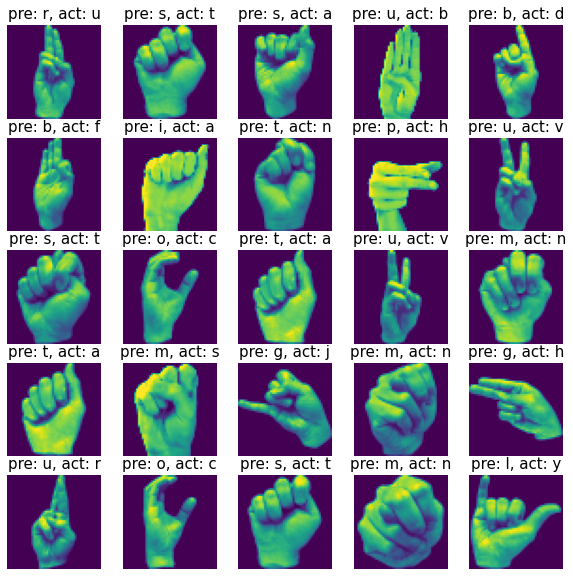

In [137]:
missedCount = len(misclassifiedIndexes)
print('Count of misclassified: {}, total test imgs: {}'.format(missedCount, len(predictions)))
print('Percent misclassified: {}%'.format(missedCount / len(predictions) * 100))
print('\nFirst 25 misclassifications:')

test_img = np.array(X_test)
test_lbl = np.array(y_test)
    
plot, axs = plt.subplots(rows, cols, figsize=figsize)
axs = trim(axs, numfigs)
for ax, badindex in zip(axs, misclassifiedIndexes[0:25]):
    digit = test_img[badindex]
    digit_pixels = digit.reshape(50, 50)
    ax.imshow(digit_pixels)
    ax.axis('off')
    ax.set_title('pre: {}, act: {}'.format(predictions[badindex], test_lbl[badindex]), fontsize = 15)

Count of misclassified: 16, total test imgs: 25
Percent misclassified: 64.0%

First 25 misclassifications:


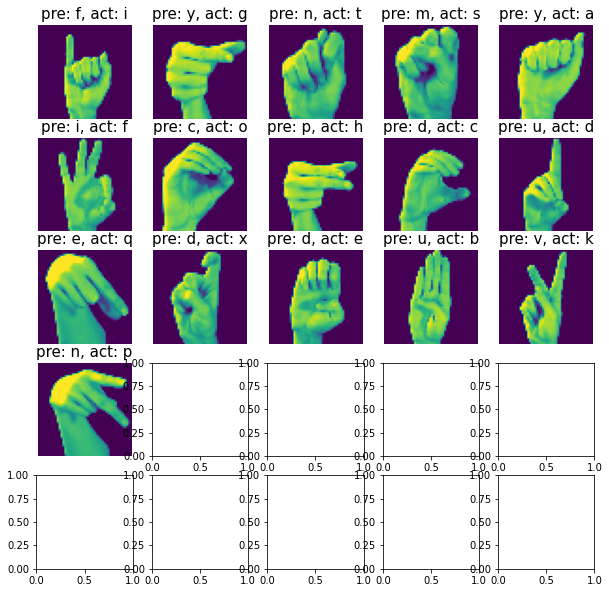

In [138]:
missedCount_2 = len(misclassifiedIndexes_2)
print('Count of misclassified: {}, total test imgs: {}'.format(missedCount_2, len(predictions_2)))
print('Percent misclassified: {}%'.format(missedCount_2 / len(predictions_2) * 100))
print('\nFirst 25 misclassifications:')

test_img_2 = np.array(X_test_2)
test_lbl_2 = np.array(y_test_2)
    
plot, axs = plt.subplots(rows, cols, figsize=figsize)
axs = trim(axs, numfigs)
for ax, badindex in zip(axs, misclassifiedIndexes_2[0:25]):
    digit = test_img_2[badindex]
    digit_pixels = digit.reshape(50, 50)
    ax.imshow(digit_pixels)
    ax.axis('off')
    ax.set_title('pre: {}, act: {}'.format(predictions_2[badindex], test_lbl_2[badindex]), fontsize = 15)